<a href="https://colab.research.google.com/github/danielimorgan/Zoo_Data_Project/blob/Lara/project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [373]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [374]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image
#Needed for report visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [375]:
# Load the training data

class_data = pd.read_csv('/content/drive/MyDrive/class.csv')
class_data.head()

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"


In [376]:
# Load the zoo data

zoo_data = pd.read_csv('/content/drive/MyDrive/zoo.csv')
zoo_data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [377]:
additional_df = pd.read_csv('/content/drive/MyDrive/zoo_extended_list_cleaned.csv')
additional_df.head()

,animal_name,class_type,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,air_breather,water_breather,venomous,fins,tail,legs
0,aardvark,1,True,False,False,True,False,False,True,True,True,True,False,False,False,False,4
1,aardwolf,1,True,False,False,True,False,False,True,True,True,True,False,False,False,True,4
2,african_elephant,1,True,False,False,True,False,False,False,True,True,True,False,False,False,True,4
3,alligator,3,True,False,True,False,False,True,True,True,True,True,False,False,True,True,4
4,alpaca,1,True,False,False,True,False,False,False,True,True,True,False,False,False,True,4


# Zoo Data Cleaning

In [378]:
# Find duplicates in the dataset.
duplicates = zoo_data[zoo_data.duplicated(subset='animal_name')]
print(duplicates)

   animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
26        frog     0         0     1     0         0        1         1   

    toothed  backbone  breathes  venomous  fins  legs  tail  domestic  \
26        1         1         1         1     0     4     0         0   

    catsize  class_type  
26        0           5  


In [379]:
# Drop duplicates
zoo_data.drop_duplicates(subset='animal_name', inplace=True)



In [380]:
# Remove the vampire from the dataset.
zoo_data = zoo_data[zoo_data['animal_name'] != 'vampire']

In [381]:
# Rename the animal_name "girl" to "human".
zoo_data.loc[zoo_data['animal_name'] == 'girl', 'animal_name'] = 'human'


In [382]:
# Check the datatypes of the dataset.
zoo_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  99 non-null     object
 1   hair         99 non-null     int64 
 2   feathers     99 non-null     int64 
 3   eggs         99 non-null     int64 
 4   milk         99 non-null     int64 
 5   airborne     99 non-null     int64 
 6   aquatic      99 non-null     int64 
 7   predator     99 non-null     int64 
 8   toothed      99 non-null     int64 
 9   backbone     99 non-null     int64 
 10  breathes     99 non-null     int64 
 11  venomous     99 non-null     int64 
 12  fins         99 non-null     int64 
 13  legs         99 non-null     int64 
 14  tail         99 non-null     int64 
 15  domestic     99 non-null     int64 
 16  catsize      99 non-null     int64 
 17  class_type   99 non-null     int64 
dtypes: int64(17), object(1)
memory usage: 14.7+ KB


In [383]:
# Change the datatype of the boolean columns to bool.
boolean_columns = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'tail', 'domestic', 'catsize']
zoo_data[boolean_columns] = zoo_data[boolean_columns].astype(bool)

In [384]:
zoo_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  99 non-null     object
 1   hair         99 non-null     bool  
 2   feathers     99 non-null     bool  
 3   eggs         99 non-null     bool  
 4   milk         99 non-null     bool  
 5   airborne     99 non-null     bool  
 6   aquatic      99 non-null     bool  
 7   predator     99 non-null     bool  
 8   toothed      99 non-null     bool  
 9   backbone     99 non-null     bool  
 10  breathes     99 non-null     bool  
 11  venomous     99 non-null     bool  
 12  fins         99 non-null     bool  
 13  legs         99 non-null     int64 
 14  tail         99 non-null     bool  
 15  domestic     99 non-null     bool  
 16  catsize      99 non-null     bool  
 17  class_type   99 non-null     int64 
dtypes: bool(15), int64(2), object(1)
memory usage: 4.5+ KB


In [385]:
# Reset the index of the DataFrame.
zoo_data = zoo_data.reset_index(drop=True)
zoo_data.head(5)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,1
1,antelope,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,1
2,bass,False,False,True,False,False,True,True,True,True,False,False,True,0,True,False,False,4
3,bear,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,1
4,boar,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,1


In [386]:
# Drop the columns "catsize" and "domestic" from the dataset.
zoo_data.drop(['catsize', 'domestic'], axis=1, inplace=True)

# Rename the column "breathes" to "air_breather".
zoo_data.rename(columns={'breathes': 'air_breather'}, inplace=True)
zoo_data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,air_breather,venomous,fins,legs,tail,class_type
0,aardvark,True,False,False,True,False,False,True,True,True,True,False,False,4,False,1
1,antelope,True,False,False,True,False,False,False,True,True,True,False,False,4,True,1
2,bass,False,False,True,False,False,True,True,True,True,False,False,True,0,True,4
3,bear,True,False,False,True,False,False,True,True,True,True,False,False,4,False,1
4,boar,True,False,False,True,False,False,True,True,True,True,False,False,4,True,1


In [387]:
# Create a new column called "water_breather" and set it to True if the animal breathes water.
zoo_data['water_breather'] = np.where(zoo_data['class_type'].isin([4, 5]), True, False)
zoo_data.head()


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,air_breather,venomous,fins,legs,tail,class_type,water_breather
0,aardvark,True,False,False,True,False,False,True,True,True,True,False,False,4,False,1,False
1,antelope,True,False,False,True,False,False,False,True,True,True,False,False,4,True,1,False
2,bass,False,False,True,False,False,True,True,True,True,False,False,True,0,True,4,True
3,bear,True,False,False,True,False,False,True,True,True,True,False,False,4,False,1,False
4,boar,True,False,False,True,False,False,True,True,True,True,False,False,4,True,1,False


In [388]:
# Create a new column order
reorder_columns = ['animal_name', 'class_type', 'hair', 'feathers', 'eggs'
                   , 'milk', 'airborne', 'aquatic', 'predator', 'toothed'
                    , 'backbone', 'air_breather', 'water_breather', 'venomous'
                    , 'fins', 'tail', 'legs']

# Reorder the columns
zoo_data = zoo_data.reindex(columns=reorder_columns)

# Print the updated DataFrame
zoo_data.head()

,animal_name,class_type,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,air_breather,water_breather,venomous,fins,tail,legs
0,aardvark,1,True,False,False,True,False,False,True,True,True,True,False,False,False,False,4
1,antelope,1,True,False,False,True,False,False,False,True,True,True,False,False,False,True,4
2,bass,4,False,False,True,False,False,True,True,True,True,False,True,False,True,True,0
3,bear,1,True,False,False,True,False,False,True,True,True,True,False,False,False,False,4
4,boar,1,True,False,False,True,False,False,True,True,True,True,False,False,False,True,4


In [389]:
# Add a new row to the DataFrame.
new_row = {'animal_name': 'salamander', 'class_type': 5, 'hair': False, 'feathers': False, 'eggs': True, 'milk': False, 'airborne': False, 'aquatic': True, 'predator': True, 'toothed': True, 'backbone': True, 'air_breather': True, 'water_breather': True, 'venomous': False, 'fins': False, 'tail': True, 'legs': 4}
zoo_data = zoo_data.append(new_row, ignore_index=True)
zoo_data.tail()

,animal_name,class_type,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,air_breather,water_breather,venomous,fins,tail,legs
95,wasp,6,True,False,True,False,True,False,False,False,False,True,False,True,False,False,6
96,wolf,1,True,False,False,True,False,False,True,True,True,True,False,False,False,True,4
97,worm,7,False,False,True,False,False,False,False,False,False,True,False,False,False,False,0
98,wren,2,False,True,True,False,True,False,False,False,True,True,False,False,False,True,2
99,salamander,5,False,False,True,False,False,True,True,True,True,True,True,False,False,True,4


# Class Data Cleaning

In [390]:
# Remove one of the frogs from the list
class_data.loc[4, 'Animal_Names'] = class_data.loc[4, 'Animal_Names'].replace('frog,', '')

class_data.loc[4, 'Animal_Names'] += ', frog, salamander'

class_data.head()


,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"newt, toad, frog, salamander"


In [391]:
# Replace Number of Animal Species in Class under mammals with 40
class_data.loc[0, 'Number_Of_Animal_Species_In_Class'] = 40

class_data.head()

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,40,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"newt, toad, frog, salamander"


In [392]:
# Remove vampire and girl from the record and replace it with human
class_data.loc[0, 'Animal_Names'] = class_data.loc[0, 'Animal_Names'].replace(
    'vampire,', '').replace('girl,', '') + ', human'

class_data.head()


,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,40,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"newt, toad, frog, salamander"


# Zoo/Class Data Merge

In [393]:
# Rename columns to match zoo_data
class_data = class_data.rename(columns={'Class_Type': 'Class_Name', 'Class_Number': 'class_type'})
class_data.head()

,class_type,Number_Of_Animal_Species_In_Class,Class_Name,Animal_Names
0,1,40,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"newt, toad, frog, salamander"


In [394]:
# Merge the two DataFrames.
merged_df = pd.merge(zoo_data, class_data, how='left', on=["class_type", "class_type"])
merged_df.head()

,animal_name,class_type,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,air_breather,water_breather,venomous,fins,tail,legs,Number_Of_Animal_Species_In_Class,Class_Name,Animal_Names
0,aardvark,1,True,False,False,True,False,False,True,True,True,True,False,False,False,False,4,40,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,True,False,False,True,False,False,False,True,True,True,False,False,False,True,4,40,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bass,4,False,False,True,False,False,True,True,True,True,False,True,False,True,True,0,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,bear,1,True,False,False,True,False,False,True,True,True,True,False,False,False,False,4,40,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,boar,1,True,False,False,True,False,False,True,True,True,True,False,False,False,True,4,40,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."


In [395]:
# Drop the extra columns
columns_to_drop = ['Number_Of_Animal_Species_In_Class', 'Animal_Names']
merged_df = merged_df.drop(columns=columns_to_drop)
merged_df.head()

,animal_name,class_type,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,air_breather,water_breather,venomous,fins,tail,legs,Class_Name
0,aardvark,1,True,False,False,True,False,False,True,True,True,True,False,False,False,False,4,Mammal
1,antelope,1,True,False,False,True,False,False,False,True,True,True,False,False,False,True,4,Mammal
2,bass,4,False,False,True,False,False,True,True,True,True,False,True,False,True,True,0,Fish
3,bear,1,True,False,False,True,False,False,True,True,True,True,False,False,False,False,4,Mammal
4,boar,1,True,False,False,True,False,False,True,True,True,True,False,False,False,True,4,Mammal


In [396]:
# Reorder columns
new_columns = ['animal_name', 'Class_Name','class_type', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'air_breather', 'water_breather', 'venomous', 'fins', 'tail', 'legs']
merged_df = merged_df.reindex(columns=new_columns)
merged_df.head()


,animal_name,Class_Name,class_type,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,air_breather,water_breather,venomous,fins,tail,legs
0,aardvark,Mammal,1,True,False,False,True,False,False,True,True,True,True,False,False,False,False,4
1,antelope,Mammal,1,True,False,False,True,False,False,False,True,True,True,False,False,False,True,4
2,bass,Fish,4,False,False,True,False,False,True,True,True,True,False,True,False,True,True,0
3,bear,Mammal,1,True,False,False,True,False,False,True,True,True,True,False,False,False,False,4
4,boar,Mammal,1,True,False,False,True,False,False,True,True,True,True,False,False,False,True,4


## Add a third csv file `corrected_animal` to the merged dataset

In [397]:
# Read the CSV file containing additional rows into a new DataFrame
additional_df = pd.read_csv('/content/drive/MyDrive/merged_extended_data.csv',sep=',')
print(additional_df.shape)
additional_df.info()

(276, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   animal_name     276 non-null    object
 1   Class_Name      276 non-null    object
 2   class_type      276 non-null    int64 
 3   hair            276 non-null    bool  
 4   feathers        276 non-null    bool  
 5   eggs            276 non-null    bool  
 6   milk            276 non-null    bool  
 7   airborne        276 non-null    bool  
 8   aquatic         276 non-null    bool  
 9   predator        276 non-null    bool  
 10  toothed         276 non-null    bool  
 11  backbone        276 non-null    bool  
 12  air_breather    276 non-null    bool  
 13  water_breather  276 non-null    bool  
 14  venomous        276 non-null    bool  
 15  fins            276 non-null    bool  
 16  tail            276 non-null    bool  
 17  legs            276 non-null    int64 
dtype

In [398]:
# Concatenate the original DataFrame with the new DataFrame containing additional rows
merged_data = pd.concat([merged_df, additional_df], ignore_index=True)
print(merged_data.shape)
# Reset the index of the concatenated DataFrame
merged_data.reset_index(drop=True, inplace=True)

# Print the concatenated DataFrame
merged_data.head()

(376, 18)


,animal_name,Class_Name,class_type,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,air_breather,water_breather,venomous,fins,tail,legs
0,aardvark,Mammal,1,True,False,False,True,False,False,True,True,True,True,False,False,False,False,4
1,antelope,Mammal,1,True,False,False,True,False,False,False,True,True,True,False,False,False,True,4
2,bass,Fish,4,False,False,True,False,False,True,True,True,True,False,True,False,True,True,0
3,bear,Mammal,1,True,False,False,True,False,False,True,True,True,True,False,False,False,False,4
4,boar,Mammal,1,True,False,False,True,False,False,True,True,True,True,False,False,False,True,4


In [399]:

#unique_class_names = merged_data['Class_Name'].unique()
#print(f"Number of unique class names: {unique_class_names}")
#filter_bug= merged_data[(merged_data['Class_Name']=='Bug')]
#filter_bug

In [400]:
#filtered_data = merged_data.filter(['air_breather'==False & 'water_breather'==False])
#filtered_df = merged_data[(merged_data['air_breather'] ==False) & (merged_data['water_breather'] ==  False)]
#filtered_df

In [401]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   animal_name     376 non-null    object
 1   Class_Name      376 non-null    object
 2   class_type      376 non-null    int64 
 3   hair            376 non-null    bool  
 4   feathers        376 non-null    bool  
 5   eggs            376 non-null    bool  
 6   milk            376 non-null    bool  
 7   airborne        376 non-null    bool  
 8   aquatic         376 non-null    bool  
 9   predator        376 non-null    bool  
 10  toothed         376 non-null    bool  
 11  backbone        376 non-null    bool  
 12  air_breather    376 non-null    bool  
 13  water_breather  376 non-null    bool  
 14  venomous        376 non-null    bool  
 15  fins            376 non-null    bool  
 16  tail            376 non-null    bool  
 17  legs            376 non-null    int64 
dtypes: bool(14

In [402]:
#Add animal_name and Class_Name to a new dataframe.
animal_name_list = merged_data['animal_name'].tolist()
class_name_list = merged_data['Class_Name'].tolist()

animal_list_df = pd.DataFrame({'animal_name': animal_name_list, 'Class_Name': class_name_list})


In [403]:
# Drop animal_name from merged_data
merged_data = merged_data.drop(columns=['animal_name'])
merged_data.head()
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Class_Name      376 non-null    object
 1   class_type      376 non-null    int64 
 2   hair            376 non-null    bool  
 3   feathers        376 non-null    bool  
 4   eggs            376 non-null    bool  
 5   milk            376 non-null    bool  
 6   airborne        376 non-null    bool  
 7   aquatic         376 non-null    bool  
 8   predator        376 non-null    bool  
 9   toothed         376 non-null    bool  
 10  backbone        376 non-null    bool  
 11  air_breather    376 non-null    bool  
 12  water_breather  376 non-null    bool  
 13  venomous        376 non-null    bool  
 14  fins            376 non-null    bool  
 15  tail            376 non-null    bool  
 16  legs            376 non-null    int64 
dtypes: bool(14), int64(2), object(1)
memory usage: 14.1+ K

# Decision Tree Model

In [404]:
# Define features set
X = merged_data.copy()
X.drop(["Class_Name", "class_type"], axis=1, inplace=True)
X.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,air_breather,water_breather,venomous,fins,tail,legs
0,True,False,False,True,False,False,True,True,True,True,False,False,False,False,4
1,True,False,False,True,False,False,False,True,True,True,False,False,False,True,4
2,False,False,True,False,False,True,True,True,True,False,True,False,True,True,0
3,True,False,False,True,False,False,True,True,True,True,False,False,False,False,4
4,True,False,False,True,False,False,True,True,True,True,False,False,False,True,4


In [405]:
 # Define target vector
y = merged_data["Class_Name"].values.reshape(-1, 1)
y[:5]


array([['Mammal'],
       ['Mammal'],
       ['Fish'],
       ['Mammal'],
       ['Mammal']], dtype=object)

In [406]:
# Split the training data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [407]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [408]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)


In [409]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [410]:
# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier()

In [411]:
#Check the data types of X_train and y_train:
print(f"X_train data type: {type(X_train)}")
print(f"y_train data type: {type(y_train)}")

X_train data type: <class 'pandas.core.frame.DataFrame'>
y_train data type: <class 'numpy.ndarray'>


In [412]:
#convert y_train to a dataframe
y_train = pd.DataFrame(y_train)

In [413]:
#check for missing values
print(f"Number of missing values in X_train: {X_train.isnull().sum().sum()}")
print(f"Number of missing values in y_train: {y_train.isnull().sum().sum()}")

Number of missing values in X_train: 0
Number of missing values in y_train: 0


In [414]:
# Train the Decision Tree model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=None, splitter='best')

In [415]:
# Make predictions on the validation set
y_val_pred = dt_model.predict(X_test)

In [416]:
# Evaluate the model on the validation set
accuracy = accuracy_score(y_test, y_val_pred)
conf_matrix = confusion_matrix(y_test, y_val_pred)
classification_rep = classification_report(y_test, y_val_pred)

In [417]:
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.9605263157894737
Confusion Matrix:
[[ 3  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0]
 [ 0  0  4  0  0  0  0]
 [ 0  0  0  3  0  0  0]
 [ 0  0  0  0  7  0  1]
 [ 0  1  0  0  0 39  0]
 [ 0  0  0  0  1  0  3]]
Classification Report:
              precision    recall  f1-score   support

   Amphibian       1.00      1.00      1.00         3
        Bird       0.93      1.00      0.97        14
         Bug       1.00      1.00      1.00         4
        Fish       1.00      1.00      1.00         3
Invertebrate       0.88      0.88      0.88         8
      Mammal       1.00      0.97      0.99        40
     Reptile       0.75      0.75      0.75         4

    accuracy                           0.96        76
   macro avg       0.94      0.94      0.94        76
weighted avg       0.96      0.96      0.96        76



In [418]:
# Make predictions on the test set
y_test_pred = dt_model.predict(X_test)

In [419]:
# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_classification_rep = classification_report(y_test, y_test_pred)

In [420]:

print("\nTest Set Results:")
print(f"Accuracy: {test_accuracy}")
print(f"Confusion Matrix:\n{test_conf_matrix}")
print(f"Classification Report:\n{test_classification_rep}")


Test Set Results:
Accuracy: 0.9605263157894737
Confusion Matrix:
[[ 3  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0]
 [ 0  0  4  0  0  0  0]
 [ 0  0  0  3  0  0  0]
 [ 0  0  0  0  7  0  1]
 [ 0  1  0  0  0 39  0]
 [ 0  0  0  0  1  0  3]]
Classification Report:
              precision    recall  f1-score   support

   Amphibian       1.00      1.00      1.00         3
        Bird       0.93      1.00      0.97        14
         Bug       1.00      1.00      1.00         4
        Fish       1.00      1.00      1.00         3
Invertebrate       0.88      0.88      0.88         8
      Mammal       1.00      0.97      0.99        40
     Reptile       0.75      0.75      0.75         4

    accuracy                           0.96        76
   macro avg       0.94      0.94      0.94        76
weighted avg       0.96      0.96      0.96        76



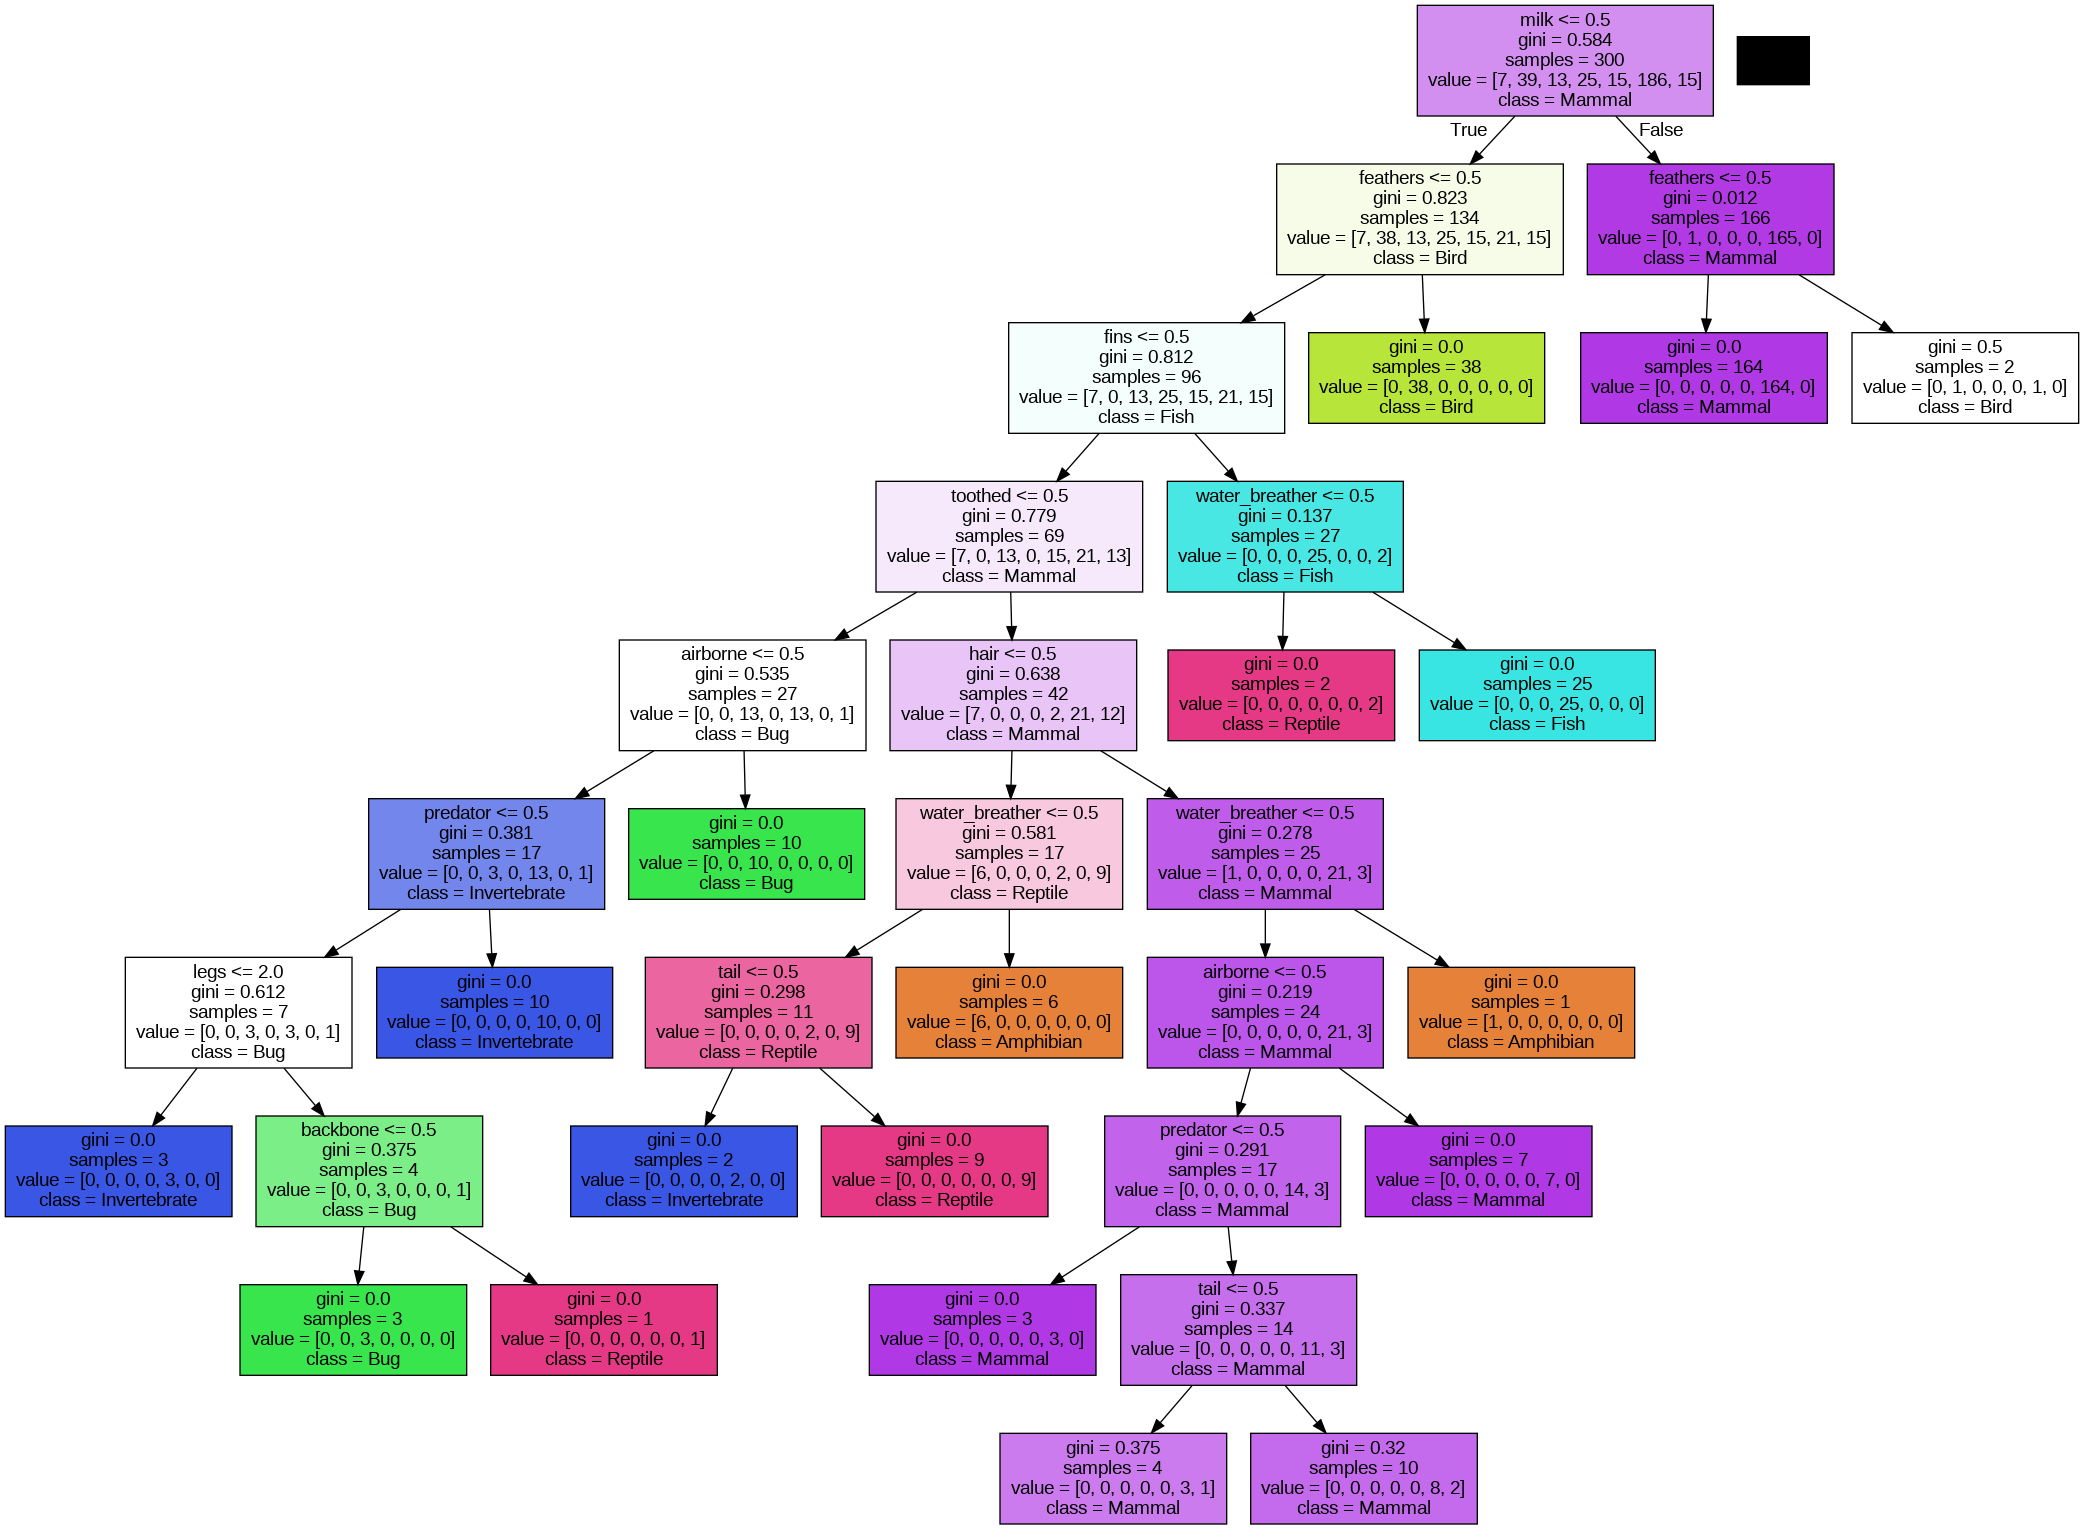

In [421]:
# Create DOT data

dot_data = tree.export_graphviz(
    dt_model, out_file=None, feature_names=X.columns, class_names=dt_model.classes_, filled=True
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())


SVM Model

In [422]:
# Fit to the training data and validate with the test data
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
#print(X_test)
predictions

array(['Mammal', 'Bird', 'Bird', 'Mammal', 'Invertebrate', 'Reptile',
       'Bird', 'Bird', 'Invertebrate', 'Mammal', 'Mammal', 'Mammal',
       'Fish', 'Bug', 'Mammal', 'Bird', 'Invertebrate', 'Mammal', 'Bug',
       'Bird', 'Invertebrate', 'Bird', 'Mammal', 'Mammal', 'Mammal',
       'Invertebrate', 'Amphibian', 'Reptile', 'Mammal', 'Amphibian',
       'Mammal', 'Mammal', 'Bird', 'Bird', 'Mammal', 'Bug', 'Mammal',
       'Amphibian', 'Mammal', 'Mammal', 'Mammal', 'Mammal', 'Bird',
       'Mammal', 'Bird', 'Mammal', 'Mammal', 'Bird', 'Bird', 'Mammal',
       'Mammal', 'Mammal', 'Bug', 'Mammal', 'Mammal', 'Invertebrate',
       'Mammal', 'Mammal', 'Mammal', 'Invertebrate', 'Bug',
       'Invertebrate', 'Mammal', 'Mammal', 'Mammal', 'Mammal', 'Mammal',
       'Mammal', 'Mammal', 'Bird', 'Reptile', 'Fish', 'Mammal', 'Bird',
       'Mammal', 'Fish'], dtype=object)

In [423]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

   Amphibian       1.00      1.00      1.00         3
        Bird       0.93      1.00      0.97        14
         Bug       0.80      1.00      0.89         4
        Fish       1.00      1.00      1.00         3
Invertebrate       0.88      0.88      0.88         8
      Mammal       1.00      0.97      0.99        40
     Reptile       1.00      0.75      0.86         4

    accuracy                           0.96        76
   macro avg       0.94      0.94      0.94        76
weighted avg       0.96      0.96      0.96        76



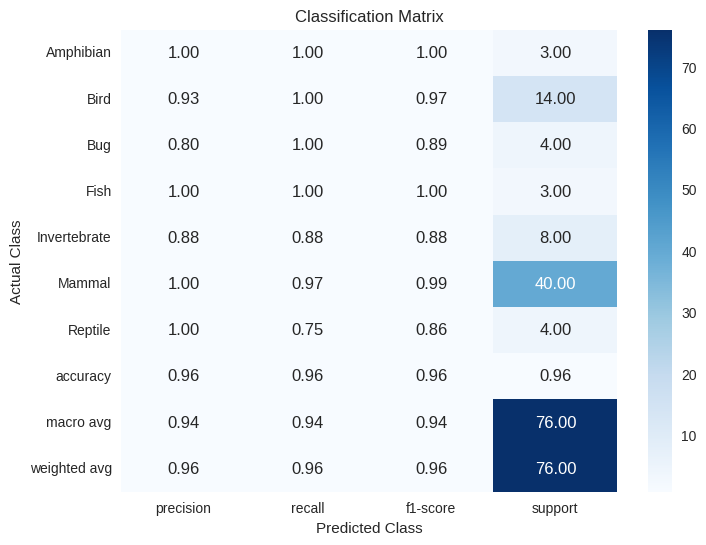

In [424]:

# Generate the classification report
report = classification_report(y_test, predictions, output_dict=True)

# Create a DataFrame from the report
report_df = pd.DataFrame(report).transpose()

# Set the class names as the index
report_df.index.name = 'Class'

# Create the classification matrix chart
fig, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(report_df, annot=True, fmt=".2f", cmap="Blues", ax=ax)

# Set the title and labels
ax.set_title('Classification Matrix')
ax.set_xlabel('Predicted Class')
ax.set_ylabel('Actual Class')

# Display the chart
plt.show()


# PyCaret

In [425]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pycaret

In [ ]:
!pip install mlflow

In [428]:
updated_merged_data = merged_data.drop(columns="class_type",  axis=1)
updated_merged_data.shape

(376, 16)

In [430]:
from pycaret.classification import *

s = setup(updated_merged_data, target="Class_Name")

# also try the code below
# s = setup(df, target="class_type")

,Description,Value
0,Session id,8713
1,Target,Class_Name
2,Target type,Multiclass
3,Target mapping,"Amphibian: 0, Bird: 1, Bug: 2, Fish: 3, Invertebrate: 4, Mammal: 5, Reptile: 6"
4,Original data shape,"(376, 16)"
5,Transformed data shape,"(376, 16)"
6,Transformed train set shape,"(263, 16)"
7,Transformed test set shape,"(113, 16)"
8,Numeric features,1
9,Preprocess,True


In [431]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9848,0.0000,0.9848,0.9814,0.9810,0.9738,0.9749,1.7710
lightgbm,Light Gradient Boosting Machine,0.9811,0.0000,0.9811,0.9777,0.9773,0.9676,0.9686,1.0100
rf,Random Forest Classifier,0.9772,0.0000,0.9772,0.9797,0.9746,0.9613,0.9628,0.4310
et,Extra Trees Classifier,0.9734,0.0000,0.9734,0.9740,0.9694,0.9545,0.9563,0.1770
xgboost,Extreme Gradient Boosting,0.9734,0.0000,0.9734,0.9721,0.9694,0.9548,0.9564,0.1200
knn,K Neighbors Classifier,0.9623,0.0000,0.9623,0.9489,0.9523,0.9350,0.9382,0.1020
dt,Decision Tree Classifier,0.9623,0.0000,0.9623,0.9616,0.9562,0.9363,0.9391,0.1110
ridge,Ridge Classifier,0.9547,0.0000,0.9547,0.9344,0.9401,0.9219,0.9264,0.1050
lr,Logistic Regression,0.9507,0.0000,0.9507,0.9262,0.9344,0.9135,0.9189,1.5300
nb,Naive Bayes,0.9352,0.0000,0.9352,0.9631,0.9416,0.8965,0.9030,0.1050


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [432]:
print(best)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=8713, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [434]:
finalize_model(best)

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None, include=['legs'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'...
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='log_loss',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100,
                                            n_iter_no_change=None,
                                            random_state=8713, subsample=1.0,
                                            tol=0.0001, validation_fraction=0.1,
                                            verbose=0, warm_start=False))],
         verbose=False)

In [435]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [436]:
predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9735,0.9962,0.9735,0.9753,0.9735,0.9562,0.9566


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,air_breather,water_breather,venomous,fins,tail,legs,Class_Name,prediction_label,prediction_score
233,False,True,True,False,False,False,True,False,True,True,False,False,False,True,2,Bird,Bird,1.0
298,True,False,False,True,False,False,True,True,True,True,False,False,False,True,4,Mammal,Mammal,1.0
102,True,False,False,True,False,False,False,True,True,True,False,False,False,True,4,Mammal,Mammal,1.0
74,True,False,False,True,False,True,True,True,True,True,False,False,True,True,2,Mammal,Mammal,1.0
191,True,False,False,True,False,False,False,True,True,True,False,False,False,False,2,Mammal,Mammal,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,False,True,True,False,True,False,True,False,True,True,False,False,False,True,2,Bird,Bird,1.0
175,False,True,True,False,True,False,False,False,True,True,False,False,False,True,2,Bird,Bird,1.0
154,True,False,False,True,False,False,False,True,True,True,False,False,False,True,4,Mammal,Mammal,1.0
202,True,False,False,True,False,False,False,True,True,True,False,False,False,True,4,Mammal,Mammal,1.0


In [437]:
dt = create_model("dt", fold = 5) #decision tree

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9245,0.0000,0.9245,0.8694,0.8930,0.8724,0.8768
1,0.9623,0.0000,0.9623,0.9676,0.9600,0.9363,0.9376
2,0.9057,0.0000,0.9057,0.8944,0.8849,0.8375,0.8440
3,0.9808,0.0000,0.9808,0.9872,0.9808,0.9684,0.9689
4,0.9615,0.0000,0.9615,0.9808,0.9647,0.9368,0.9385
Mean,0.9470,0.0000,0.9470,0.9399,0.9367,0.9103,0.9132
Std,0.0276,0.0000,0.0276,0.0484,0.0396,0.0479,0.0457


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [438]:
svm = create_model("svm", fold = 5) #SVM

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8491,0.0000,0.8491,0.8349,0.8331,0.7515,0.7687
1,0.9434,0.0000,0.9434,0.9503,0.9340,0.9027,0.9061
2,0.9057,0.0000,0.9057,0.8944,0.8849,0.8375,0.8440
3,0.9615,0.0000,0.9615,0.9769,0.9599,0.9366,0.9383
4,0.9615,0.0000,0.9615,0.9808,0.9647,0.9368,0.9385
Mean,0.9242,0.0000,0.9242,0.9275,0.9153,0.8730,0.8791
Std,0.0428,0.0000,0.0428,0.0556,0.0499,0.0707,0.0651


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [439]:
rf = create_model("rf", fold = 5) #random forest

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9434,0.0000,0.9434,0.9113,0.9230,0.9061,0.9099
1,0.9623,0.0000,0.9623,0.9676,0.9600,0.9363,0.9376
2,0.9245,0.0000,0.9245,0.9016,0.9074,0.8701,0.8745
3,0.9808,0.0000,0.9808,0.9872,0.9808,0.9684,0.9689
4,0.9808,0.0000,0.9808,0.9872,0.9808,0.9684,0.9689
Mean,0.9583,0.0000,0.9583,0.9510,0.9504,0.9298,0.9320
Std,0.0219,0.0000,0.0219,0.0372,0.0301,0.0378,0.0362


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [440]:
nb = create_model("nb", fold = 5) #naive Bayes

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9434,0.0000,0.9434,0.9491,0.9423,0.9076,0.9093
1,0.9623,0.0000,0.9623,0.9774,0.9664,0.9394,0.9420
2,0.8679,0.0000,0.8679,0.8758,0.8643,0.7876,0.7929
3,0.9423,0.0000,0.9423,0.9769,0.9521,0.9083,0.9125
4,0.9615,0.0000,0.9615,0.9808,0.9659,0.9378,0.9396
Mean,0.9355,0.0000,0.9355,0.9520,0.9382,0.8962,0.8993
Std,0.0348,0.0000,0.0348,0.0398,0.0380,0.0560,0.0549


Processing:   0%|          | 0/4 [00:00<?, ?it/s]